In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
clicks_df = pd.read_csv('/content/drive/My Drive/Data mining/stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,...,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,49.0,127.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,20.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,9.0,81.0,13.0,4.0,6.0,0.0,32.0,0.0,48.0,16.0,0.0,0.0,29.0,9.0,73.0,7.0,59.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,3.0,0.0,0.0,0.0,0.0,11.0,48.0,29.0,0.0,0.0,0.0,0.0,54.0,37.0,16.0,0.0,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,69.0,0.0,0.0,27.0,0.0,1.0,0.0,12.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,41.0,19.0,...,26.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,13.0,6.0,7.0,21.0,74.0,0.0,21.0,75.0,0.0,0.0,17.0,11.0,11.0,8.0,0.0,14.0,0.0,0.0,0.0,40.0,...,0.0,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
stud_df = pd.read_csv('/content/drive/My Drive/Data mining/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [ ]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,...,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,49.0,127.0,4.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,78.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,9.0,81.0,13.0,4.0,6.0,0.0,32.0,0.0,48.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,3.0,0.0,0.0,0.0,0.0,11.0,48.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,69.0,0.0,0.0,27.0,0.0,1.0,0.0,12.0,0.0,0.0,22.0,0.0,...,26.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,30.0,6.0,25.0,10.0,30.0,4.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,13.0,6.0,7.0,21.0,74.0,0.0,21.0,75.0,0.0,0.0,17.0,11.0,...,0.0,5.0,0.0,0.0,7.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# no of records based on age group
data['age_band'].value_counts()

0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

In [ ]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [ ]:
# data used in training and test
X_train['age_band'].value_counts(),print('\n============\n'),X_test['age_band'].value_counts()

(0-35     18370
 35-55     7535
 55<=       169
 Name: age_band, dtype: int64, None, 0-35     4574
 35-55    1898
 55<=       47
 Name: age_band, dtype: int64)

In [ ]:
X_train['result'] = y_train

# age group 0-35
data1 = X_train.query('age_band=="0-35"')
y1 = data1['result']

# age group 35-55
data2 = X_train.query('age_band=="35-55"')
y2 = data2['result']

# age group 55>=
data3 = X_train.query('age_band=="55<="')
y3 = data3['result']

In [ ]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 250)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=275)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # age group
    X2 = X['age_band']
            
    return X1, X2

def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

In [ ]:
# prepare the data
x1, _ = prepare_data(data1)
x2, _ = prepare_data(data2)
x3, _ = prepare_data(data3)

X_test_clicks, age_group = prepare_data(X_test)

# print stastic
print('Train Data:', x1.shape, x2.shape, x3.shape)
print('Test Data: ', X_test_clicks.shape, age_group.shape)
print('Test target count:', Counter(y_test))

Train Data: (18370, 40) (7535, 40) (169, 40)
Test Data:  (6519, 40) (6519,)
Test target count: Counter({0: 3442, 1: 3077})


In [ ]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, BatchNormalization, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential, Model

In [ ]:
# Define ann model
def ann_model():
    ann = Sequential()
    ann.add(Input(shape=(x1.shape[1], )))
    ann.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(1, activation='sigmoid'))
    # compile the model
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

# define cnn model
def cnn_model():
    cnn = Sequential()
    cnn.add(Input(shape=(x1.shape[1], 1)))
    cnn.add(Conv1D(16, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Flatten())
    cnn.add(Dense(128,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(64,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(32,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(1,  activation='sigmoid'))
    # compile the model
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn

# define lstm model
def lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(25, activation='relu', input_shape=(x1.shape[1],1), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
    lstm.add(LSTM(10, activation='relu', return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
    lstm.add(Dense(1, activation='sigmoid'))
    # compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm

# ANN base model

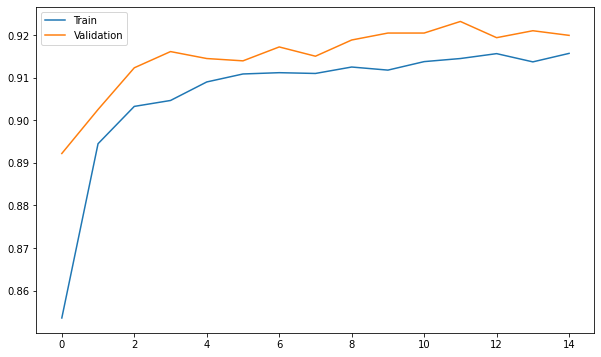

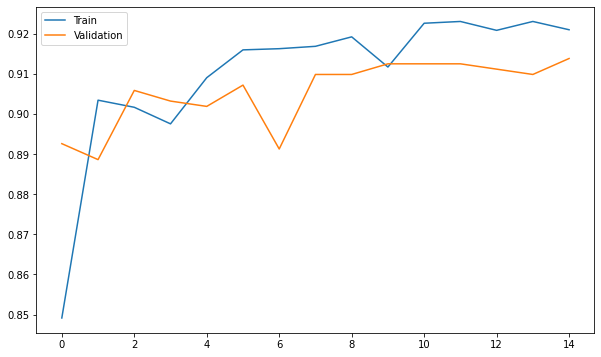

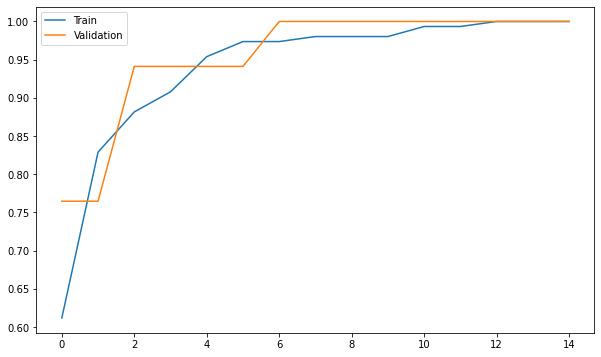

In [ ]:
path1 = '/content/drive/My Drive/Data mining/model/age_model_1.h5'
callbacks = ModelCheckpoint(path1, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model1 = ann_model()
hist = model1.fit(x1, y1, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

path2 = '/content/drive/My Drive/Data mining/model/age_model_2.h5'
callbacks = ModelCheckpoint(path2, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model2 = ann_model()
hist = model2.fit(x2, y2, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)


path3 = '/content/drive/My Drive/Data mining/model/age_model_3.h5'
callbacks = ModelCheckpoint(path3, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model3 = ann_model()
hist = model3.fit(x3, y3, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

In [ ]:
prediction = []

# load model
model1.load_weights(path1)
model2.load_weights(path2)
model3.load_weights(path3)

for i in range(len(X_test_clicks)):
    age = age_group.iloc[i]
    if age=='0-35':        
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, -1)
        prediction.append(model1.predict(test)[0][0])
    elif age=='35-55':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, -1)
        prediction.append(model2.predict(test)[0][0])
    else:
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, -1)
        prediction.append(model3.predict(test)[0][0])

In [ ]:
predict = np.array(prediction)
predict = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict, y_test))

result = pd.DataFrame(classification_report(predict, y_test,output_dict=True)).T
result['accuracy'] = result.loc['accuracy', 'precision']
result = result.iloc[:2, [0,1,2,4]]
result['model'] = 'ANN'
result

Accuracy:  0.9167050161067648


,precision,recall,f1-score,accuracy,model
0,0.876816,0.962066,0.917465,0.916705,ANN
1,0.961326,0.874630,0.915931,0.916705,ANN


In [ ]:
# change the data into input-format --> (batch_size, time_steps, n_features)
x1 = x1.to_numpy().reshape(x1.shape[0], x1.shape[1], 1)
x2 = x2.to_numpy().reshape(x2.shape[0], x2.shape[1], 1)
x3 = x3.to_numpy().reshape(x3.shape[0], x3.shape[1], 1)

# CNN base model

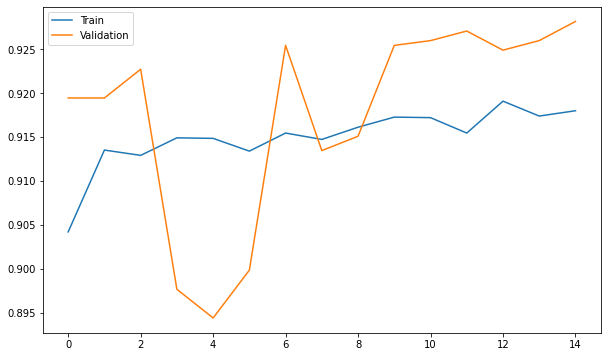

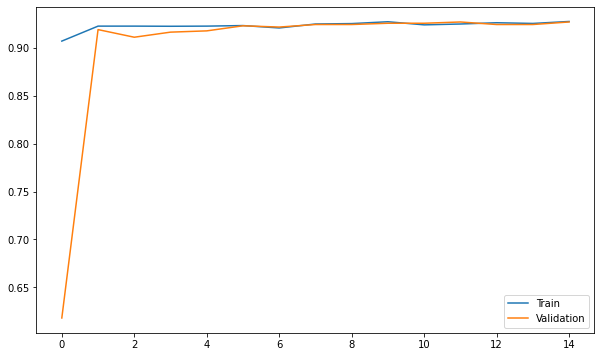

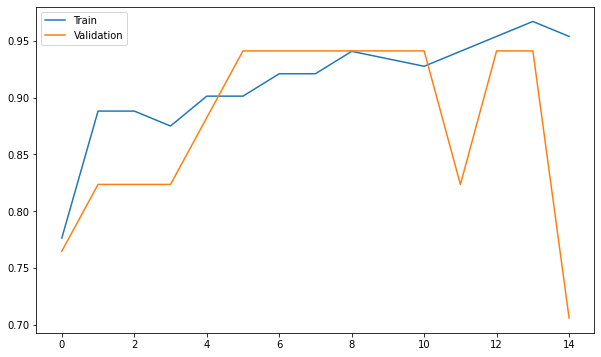

In [ ]:
path1 = '/content/drive/My Drive/Data mining/model/age_model_1.h5'
callbacks = ModelCheckpoint(path1, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model1 = cnn_model()
hist = model1.fit(x1, y1, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

path2 = '/content/drive/My Drive/Data mining/model/age_model_2.h5'
callbacks = ModelCheckpoint(path2, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model2 = cnn_model()
hist = model2.fit(x2, y2, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)


path3 = '/content/drive/My Drive/Data mining/model/age_model_3.h5'
callbacks = ModelCheckpoint(path3, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model3 = cnn_model()
hist = model3.fit(x3, y3, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

In [ ]:
prediction = []

# load model
model1.load_weights(path1)
model2.load_weights(path2)
model3.load_weights(path3)

for i in range(len(X_test_clicks)):
    age = age_group.iloc[i]
    if age=='0-35':        
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, x1.shape[1], 1)
        prediction.append(model1.predict(test)[0][0])
    elif age=='35-55':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, x1.shape[1], 1)
        prediction.append(model2.predict(test)[0][0])
    else:
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, x1.shape[1], 1)
        prediction.append(model3.predict(test)[0][0])

In [ ]:
predict = np.array(prediction)
predict = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'CNN'

result = pd.concat([result, r])
result

Accuracy:  0.9213069489185458


,precision,recall,f1-score,accuracy,model
0,0.876816,0.962066,0.917465,0.916705,ANN
1,0.961326,0.874630,0.915931,0.916705,ANN
0,0.879140,0.968940,0.921858,0.921307,CNN
1,0.968476,0.877503,0.920748,0.921307,CNN


#LSTM base model

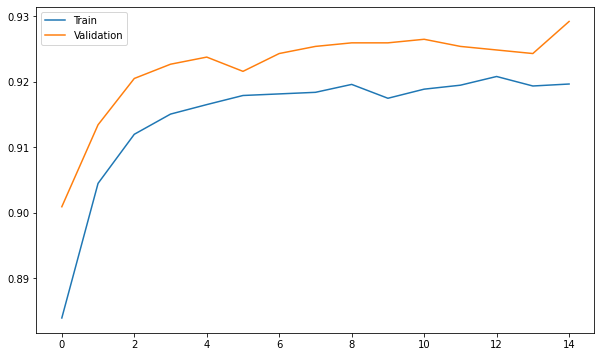

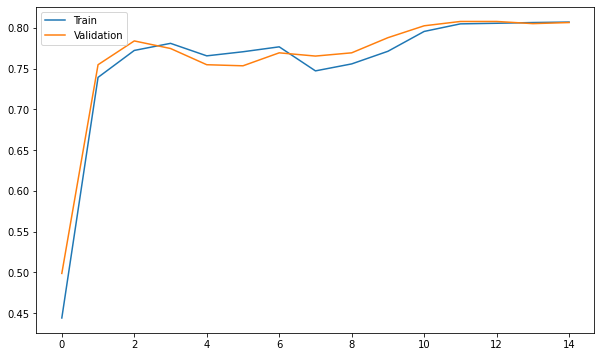

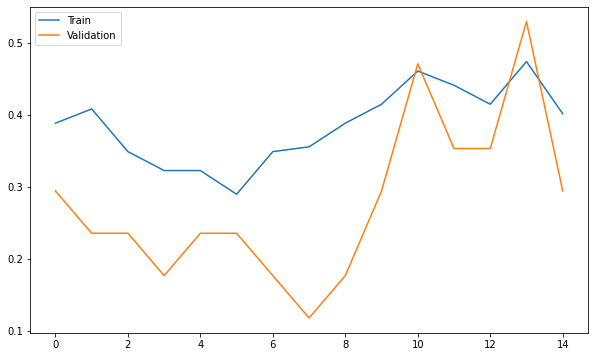

In [ ]:
path1 = '/content/drive/My Drive/Data mining/model/age_model_1.h5'
callbacks = ModelCheckpoint(path1, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model1 = lstm_model()
hist = model1.fit(x1, y1, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

path2 = '/content/drive/My Drive/Data mining/model/age_model_2.h5'
callbacks = ModelCheckpoint(path2, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model2 = lstm_model()
hist = model2.fit(x2, y2, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)


path3 = '/content/drive/My Drive/Data mining/model/age_model_3.h5'
callbacks = ModelCheckpoint(path3, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

model3 = lstm_model()
hist = model3.fit(x3, y3, validation_split=0.1, epochs=15, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist)

In [ ]:
prediction = []

# load model
model1.load_weights(path1)
model2.load_weights(path2)
model3.load_weights(path3)

for i in range(len(X_test_clicks)):
    age = age_group.iloc[i]
    if age=='0-35':        
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, x1.shape[1], 1)
        prediction.append(model1.predict(test)[0][0])
    elif age=='35-55':
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, x1.shape[1], 1)
        prediction.append(model2.predict(test)[0][0])
    else:
        test = X_test_clicks.iloc[i, :].to_numpy().reshape(1, x1.shape[1], 1)
        prediction.append(model3.predict(test)[0][0])

In [ ]:
predict = np.array(prediction)
predict = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'LSTM'

result = pd.concat([result, r])
result

Accuracy:  0.8815769289768369


,precision,recall,f1-score,accuracy,model
0,0.876816,0.962066,0.917465,0.916705,ANN
1,0.961326,0.874630,0.915931,0.916705,ANN
0,0.879140,0.968940,0.921858,0.921307,CNN
1,0.968476,0.877503,0.920748,0.921307,CNN
0,0.809994,0.959394,0.878387,0.881577,LSTM
1,0.961651,0.818987,0.884604,0.881577,LSTM
